         Date   3-Day Avg
0  2023-08-21         NaN
1  2023-08-21         NaN
2  2023-08-21  433.613333
3  2023-08-21  177.266667
4  2023-08-21  142.366667
..        ...         ...
64 2023-08-27  427.866667
65 2023-08-27  552.863333
66 2023-08-27  552.070000
67 2023-08-27  479.726667
69 2023-08-27  352.573333

[70 rows x 2 columns]


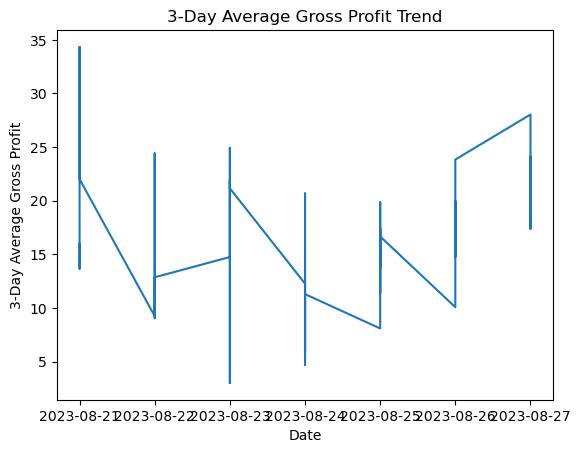

Gross Margin for Each Vendor:
Firm bought from
Vendor1      53.23
Vendor10     82.58
Vendor2     161.11
Vendor3     165.18
Vendor4     170.11
Vendor5     116.98
Vendor6      32.11
Vendor7     224.98
Vendor8      35.66
Vendor9     165.26
dtype: float64

Gross Margin for Each Customer:
Customer
Customer1     132.59
Customer10     87.44
Customer2     164.56
Customer3      90.63
Customer4     123.97
Customer5     115.45
Customer6     135.23
Customer7     115.33
Customer8     184.38
Customer9      57.62
dtype: float64

Vendor to be fired: Vendor6
Least Profitable Customer: Customer9
Buying Price Percentiles:
0.25    29.90
0.50    60.76
0.75    78.32
Name: Buying price, dtype: float64

Selling Price Percentiles:
0.25     38.9750
0.50     78.9900
0.75    103.3975
Name: Selling price, dtype: float64

FREQUENCY OF BUYING PRICE(below 25%)::
18

FREQUENCY OF SELLING PRICE(75%)::
18
OPTIMAL GROSS MARGIN: 6903.3099999999995
VENDOR WITH HIGHEST GROSS MARGIN: Vendor4
THEORITICAL MAXIMUM MARGIN: 6903.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'sales_data_2.csv'
sales_data = pd.read_csv(file_path)

sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data = sales_data.sort_values('Date')
sales_data['Daily Gross Profit'] = (sales_data['Selling price'] - sales_data['Buying price']) * sales_data['Quantity sold']
sales_data['3-Day Avg'] = sales_data['Daily Gross Profit'].rolling(window=3).mean()

trend_analysis = sales_data[['Date', '3-Day Avg']]
print(trend_analysis)

sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data.set_index('Date', inplace=True)
daily_gross_profit = sales_data['Selling price'] - sales_data['Buying price']
three_day_average = daily_gross_profit.rolling(window=3).mean()

# 2. Visualize the 3-day trend changes over time
plt.plot(three_day_average.index, three_day_average.values)
plt.xlabel('Date')
plt.ylabel('3-Day Average Gross Profit')
plt.title('3-Day Average Gross Profit Trend')
plt.show()



vendor_profit = sales_data.groupby('Firm bought from')['Selling price'].sum() - sales_data.groupby('Firm bought from')['Buying price'].sum()

# Calculate the gross margin for each customer
customer_profit = sales_data.groupby('Customer')['Selling price'].sum() - sales_data.groupby('Customer')['Buying price'].sum()

# Find the least profitable vendor and customer
least_profitable_vendor = vendor_profit.idxmin()
least_profitable_customer = customer_profit.idxmin()

# Print the results
print("Gross Margin for Each Vendor:")
print(vendor_profit)
print("\nGross Margin for Each Customer:")
print(customer_profit)
print("\nVendor to be fired:", least_profitable_vendor)
print("Least Profitable Customer:", least_profitable_customer)


buying_price_percentiles = sales_data['Buying price'].quantile([0.25, 0.5, 0.75])
selling_price_percentiles = sales_data['Selling price'].quantile([0.25, 0.5, 0.75])

print("Buying Price Percentiles:")
print(buying_price_percentiles)
print("\nSelling Price Percentiles:")
print(selling_price_percentiles)

sapota_prices_below_25 = sales_data[sales_data['Buying price'] < buying_price_percentiles[0.25]]
sapota_prices_above_75 = sales_data[sales_data['Selling price'] > selling_price_percentiles[0.75]]

print("\nFREQUENCY OF BUYING PRICE(below 25%)::")
print(sapota_prices_below_25.shape[0])
print("\nFREQUENCY OF SELLING PRICE(75%)::")
print(sapota_prices_above_75.shape[0])

vendor_4_data = sales_data[sales_data['Firm bought from'] == 'Vendor4']
vendor_4_contribution = ((vendor_4_data['Selling price'] - vendor_4_data['Buying price']) * vendor_4_data['Quantity sold']).sum()

vendor_gross_margin = sales_data.groupby('Firm bought from').apply(lambda x: ((x['Selling price'] - x['Buying price']) * x['Quantity sold']).sum())
strategic_vendor = vendor_gross_margin.idxmax()
theoretical_max_margin = vendor_gross_margin.max()

print(f"OPTIMAL GROSS MARGIN: {vendor_4_contribution}")
print(f"VENDOR WITH HIGHEST GROSS MARGIN: {strategic_vendor}")
print(f"THEORITICAL MAXIMUM MARGIN: {theoretical_max_margin}")

# Add the code for optimizing the sales process below:
# 3. Optimize the sales process to ensure gross margin is maximized
#    1. Would you fire any vendor?
#    2. Would you let go of any customer?

# Calculate the gross margin for each vendor